In [1]:
import pandas as pd
import numpy as np
from zopi.spatial import create_circle
import geopandas as gpd

/home/pepe/miniconda3/envs/desarollo_plataforma/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/pepe/miniconda3/envs/desarollo_plataforma/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/pepe/miniconda3/envs/desarollo_plataforma/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is dep

In [2]:
#def gen_nombre(tam):
#    nombres = []
#    for n in range(tam):
#    
#        nombre = []
#        for i in range(5):
#            nombre.append(np.random.choice(list('qwertyuiopasdfghjklzxcvbnm')))
#        nombre=''.join(nombre)
#        nombres.append(nombre)
#    return nombres

In [7]:
#n = 60
#sample_places = pd.read_csv('data/carpetas_completa_marzo_2022.csv',
#                            usecols=["longitud", "latitud"],
#                           nrows=n).dropna()
#sample_places= (sample_places
#                .assign(nombre =  gen_nombre(tam = sample_places.shape[0]))
#                .set_index('nombre'))

In [9]:
sample_places = pd.read_csv('s3://opi-data-science/play/pepe/Ubicación de equipos RMX - Hoja 1.csv')

In [10]:
sample_places.head()

,zona,equipo,parque,direccion,coordenadas,orden
0,Zona Hyadi,Juvenil In lak'ech Hala Ken,PCM,"C. Gabriel Mancera 415, Col del Valle Centro, ...","19.391020429764122, -99.16339798149812",NaN
1,Zona Hyadi,Conquista Antares,Parque Hundido,"Av Porfirio Díaz 130B, Extremadura Insurgentes...","19.378484502264673, -99.18061940264813",1.0
2,Zona Hyadi,Conquista Deneb,Las Américas,"Diag. San Antonio 1737, Narvarte Oriente, Beni...","19.401124824202494, -99.14856673204054",1.0
3,Zona Hyadi,Cadena Eyldon,Parque San Lorenzo,"Manzanas 65, Tlacoquemecatl del Valle, Benito ...","19.376015558104193, -99.17675366710313",NaN
4,Zona Hyadi,Escuadrón Ilampú,Parque Arboledas,"Heriberto Frías 921, Col del Valle Centro, Ben...","19.377955275408578, -99.1623686209967",NaN


In [22]:
sample_places =(sample_places
 .assign(nombre= lambda x: x.zona + ', ' + x.equipo + ', ' + x.parque)
 .set_index('nombre')
 .coordenadas.str.split(',', expand = True)
.rename(columns = {0:'latitud', 1:'longitud'})
 .assign(longitud= lambda x: x.longitud.astype(float),
        latitud= lambda x: x.latitud.astype(float))
)

In [23]:
circulos = []
r = 250
for row in sample_places.itertuples():
    circulos.append(create_circle(latitud=row.latitud, longitud=row.longitud, radio_metros=r))

In [24]:
sample_places= (sample_places
 .assign(geometry= circulos)
.pipe(gpd.GeoDataFrame))

In [31]:
str(sample_places.loc['Zona Hyadi, Conquista Deneb, Las Américas'].geometry)

'POLYGON ((-99.14618021569405 19.40107977721615, -99.14619636262987 19.40085803470255, -99.14623533738504 19.40063886174527, -99.14629676450545 19.40042436907952, -99.14638005231764 19.40021662235592, -99.14648439863065 19.40001762224814, -99.1466087984648 19.39982928518705, -99.14675205373281 19.39965342490633, -99.14691278477987 19.39949173497714, -99.14708944367162 19.39934577250072, -99.14728032910176 19.39921694311461, -99.14748360277603 19.39910648745833, -99.14769730711461 19.39901546922722, -99.14791938410241 19.39894476493079, -99.14814769510608 19.39889505545305, -99.14838004146678 19.39886681949669, -99.14861418567055 19.39886032897391, -99.14884787289267 19.39887564638844, -99.1490788527085 19.39891262423359, -99.14930490076209 19.39897090641268, -99.14952384018383 19.39904993166755, -99.14973356255119 19.39914893898252, -99.14993204819076 19.39926697491204, -99.15011738562623 19.39940290276076, -99.15028778998503 19.39955541352865, -99.1504416201866 19.39972303851487, -99.

<AxesSubplot:>

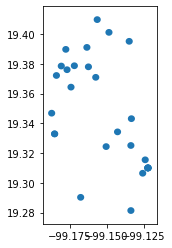

In [25]:
sample_places.plot()

In [26]:
sample_places.to_file('data/places.geojson', driver = 'GeoJSON')